## Matplotlib.Pyplot
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer. It is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. First we will work with the scripting layer to learn how to generate line plots. Later, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer. Let us take a look at the webpage with the documentation: **https://matplotlib.org**

With Pandas we can make quick visualization and it is based on Matplotlib. However, if we want to modify the plots we need to use Matplotlib directly. Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [1]:
# we are using the inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# change the font size globally and also the resolution
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.dpi'] = 120.

Let us start with a simple example:

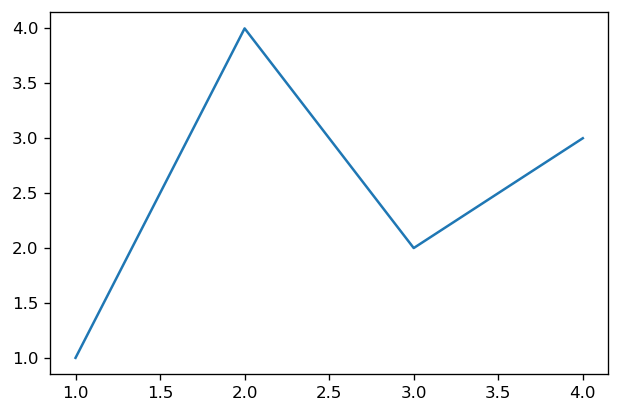

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

**Formatting the style of your plot**

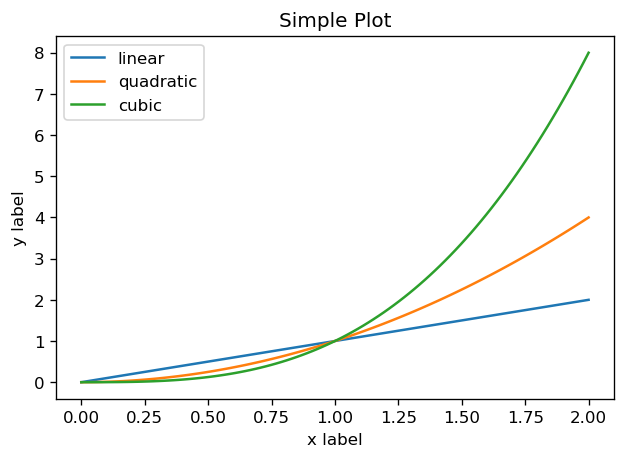

In [3]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

# we can also include LaTteX 
# plt.title("$x, x^2, x^3$")

# or change the backend
# %matplotlib osx
# %matplotlib inline

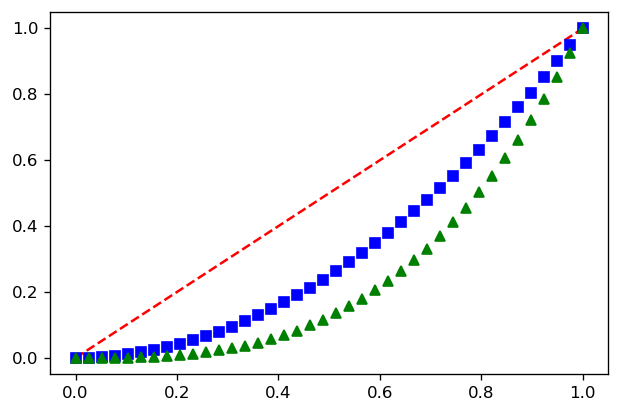

In [4]:
t = np.linspace(0., 1., 40)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

**Plotting with keyword strings**

In [5]:
data_frame = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data_frame['b'] = data_frame['a'] + 10 * np.random.randn(50)
data_frame['d'] = np.abs(data_frame['d']) * 100
data_frame=pd.DataFrame(data_frame)
data_frame.head()

,a,c,d,b
0,0,7,79.981883,-16.748503
1,1,20,28.900566,16.435642
2,2,48,26.988500,7.474112
3,3,49,54.220289,-0.399282
4,4,28,154.616812,-11.862492


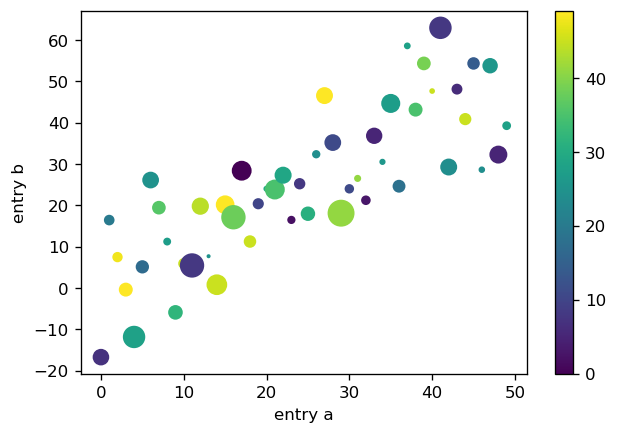

In [6]:
plt.scatter('a', 'b', c='c', s='d', data=data_frame)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.colorbar();

Further formatting

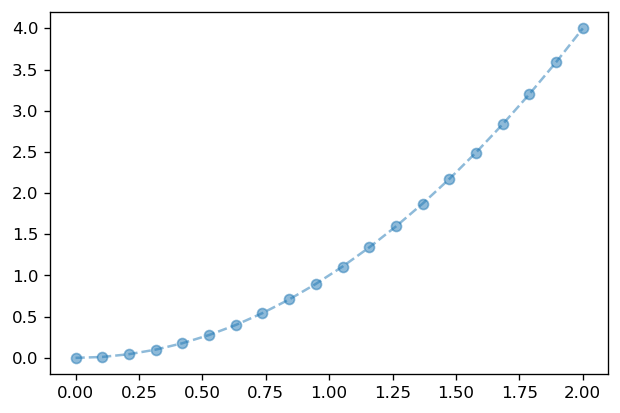

In [7]:
# alpha
# linestyle or ls: [ '-' | '--' | '-.' | ':' | 'steps' | ...]
# linewidth or lw: float value in points
# marker [ '+' | ',' | '.' | '1' | '2' | '3' | '4' ]
x=np.linspace(0,2,20)
plt.plot(x,x**2,ls='--',marker='o',alpha= 0.5);


**Working with multiple figures and axes**  
MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.m

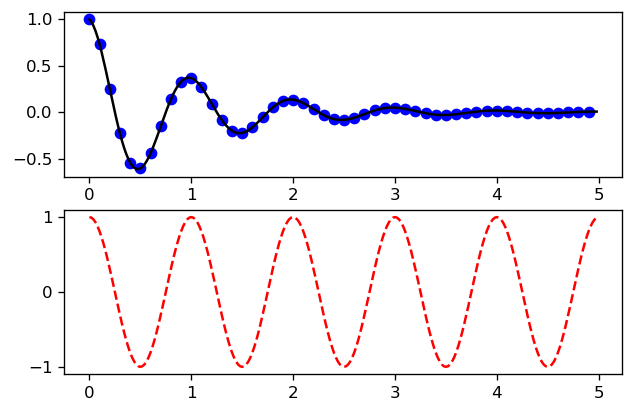

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

For **further kind of plots** take a look here:  
https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py  
Or if you want to change the style of your plots:
https://matplotlib.org/tutorials/introductory/customizing.html#sphx-glr-tutorials-introductory-customizing-py

A nice example of how to make your plots in **your own style**: Cyberpunk Style.  
**The Basis**

In [9]:
import pandas as pd

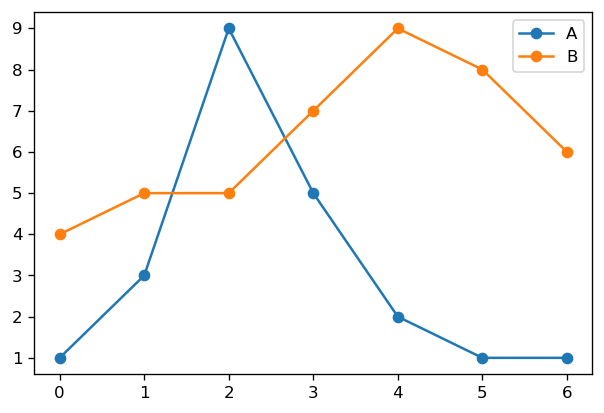

In [10]:
df = pd.DataFrame({'A': [1, 3, 9, 5, 2, 1, 1],
                   'B': [4, 5, 5, 7, 9, 8, 6]})
df.plot(marker='o') # this is pandas plotting which is based on matplotlib

**The Darkness**  
Not bad, but somewhat ordinary. Let’s customize it by using Seaborn’s dark style, as well as changing background and font colors:

In [11]:
print(plt.style.available)
#mpl.style.use(['ggplot']) # optional: for ggplot-like style
# mpl.style.use(['classic'])

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


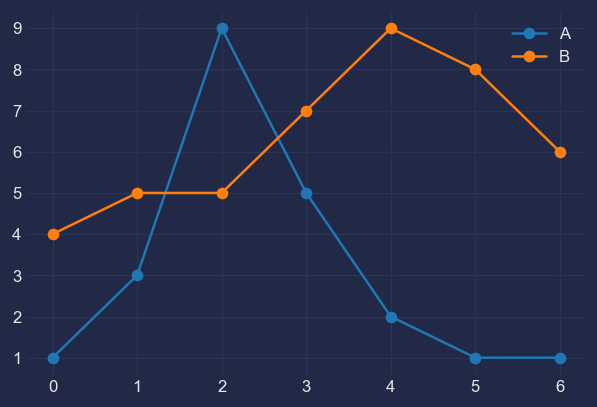

In [12]:
plt.style.use("seaborn-dark")

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax = df.plot(marker='o')
ax.grid(color='#2A3459') # bluish dark grey, but slightly lighter than background

**The Light**  
It looks more interesting now, but we need our colors to shine more against the dark background:

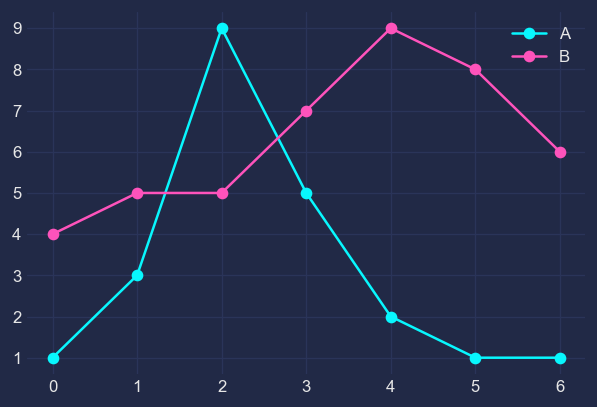

In [13]:
fig, ax = plt.subplots()
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]
df.plot(marker='o', ax=ax, color=colors)
ax.grid(color='#2A3459')

**The Glow**  
Now, how to get that neon look? To make it shine, we redraw the lines multiple times, with low alpha value and slighty increasing linewidth. The overlap creates the glow effect.

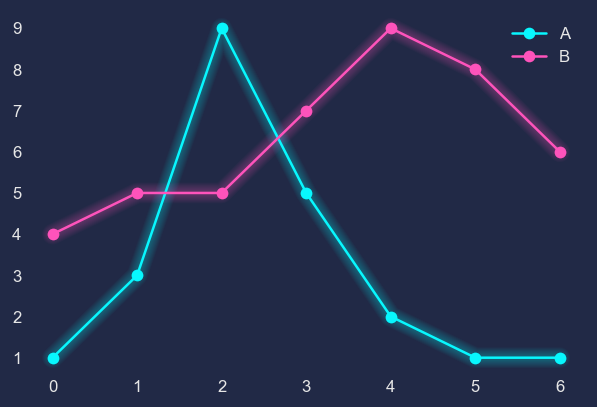

In [14]:
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.03
fig, ax = plt.subplots()
for n in range(1, n_lines+1):
    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)
df.plot(marker='o', ax=ax, color=colors)

**The Finish**

(0, 9.45)

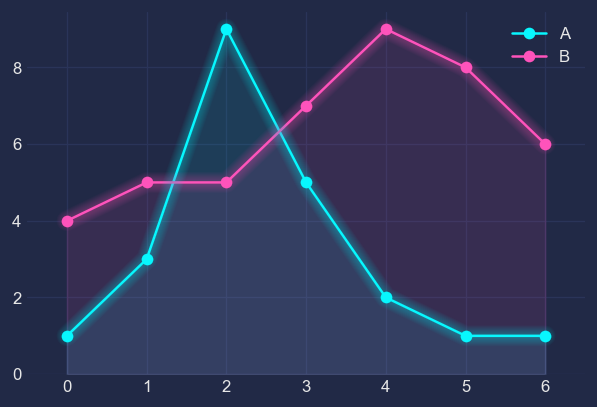

In [15]:
fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)
# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)
# Color the areas below the lines:
for column, color in zip(df, colors):
    ax.fill_between(x=df.index,
                    y1=df[column].values,
                    y2=[0] * len(df),
                    color=color,
                    alpha=0.1)
ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])  # to not have the markers cut off
ax.set_ylim(0)


---
This example is taken from https://towardsdatascience.com/cyberpunk-style-with-matplotlib-f47404c9d4c5

---